In [3]:
import pandas as pd

import numpy as np

from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')


from sklearn import model_selection, naive_bayes, svm

from sklearn.metrics import accuracy_score


reviews_df = pd.read_csv('Amazon_Reviews.csv')

y = reviews_df['Label']

reviews_df.drop(columns = 'Label', axis = 1, inplace = True)

# Data Preprocessing - removal of stopwords, tokenizing and stemming

In [5]:
x_train,x_test,y_train,y_test = train_test_split(reviews_df,y,test_size=0.2,random_state = 30)

#x_train

In [13]:
from nltk.corpus import stopwords

from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer, PorterStemmer


tokenizer = RegexpTokenizer(r'\w+')  #All alphanumeric patterns are extracted

lemmatizer = WordNetLemmatizer()

stemmer = PorterStemmer()


def preprocessing(review):
    
    #final_tokens = ' '
    tokens = tokenizer.tokenize(review)
    #print('Tokens:', tokens)
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure Tokens:', pure_tokens)
    stemmed_tokens = [stemmer.stem(pure_token) for pure_token in pure_tokens]
    #print('Stemmed Tokens:', stemmed_tokens)
    final_tokens = ' '.join(stemmed_tokens)
    
    return final_tokens


x_train['Cleaned_Text'] = x_train['Review'].apply(preprocessing)

x_train['Cleaned_Text']
    

    

125    delici addict cereal great tast good crave wor...
60     homer mose extrem help gem complex subject sec...
90     instruct includ trust seller promis item compl...
152    buyer bewar one cheesi compil find session ban...
40     mind numb game make thing never hold son atten...
                             ...                        
140    found henri dog two henri dog one lost ride wa...
45     fast mp3 download music wax decad ago one 26 s...
173    worth invest great set block research differ b...
165    block keep mind got see incrediblock fp catalo...
37     great play larri work muse label late 80 earli...
Name: Cleaned_Text, Length: 159, dtype: object

# Generating the TfIdf Matrix

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)

vectorizer.fit(x_train['Cleaned_Text'])

x_train_TfIdf = vectorizer.transform(x_train['Cleaned_Text'])

x_test['Cleaned_Text'] = x_test['Review'].apply(preprocessing)

x_test_TfIdf = vectorizer.transform(x_test['Cleaned_Text'])

# Fitting the Model

0.7813333333333333

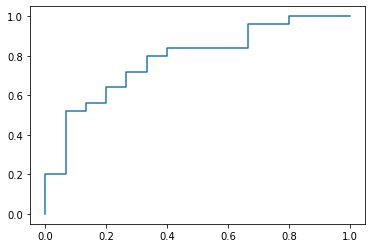

In [22]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

import matplotlib.pyplot as plt


clf = MultinomialNB().fit(x_train_TfIdf.toarray(),y_train)

clf.score(x_train_TfIdf.toarray(),y_train)

y_pred = clf.predict(x_test_TfIdf.toarray())

confusion_matrix(y_test,y_pred)

y_proba_pred = clf.predict_proba(x_test_TfIdf.toarray())[::,1]

fpr,tpr,tresholds = roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)

0.7893333333333333

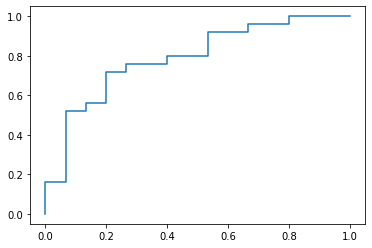

In [25]:
#Trying Logistic Regression

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(x_train_TfIdf,y_train)

y_logit_pred = logit.predict(x_test_TfIdf)

y_logit_proba = logit.predict_proba(x_test_TfIdf.toarray())[::,1]

log_fpr,log_tpr,log_tresholds = roc_curve(y_test, y_logit_proba)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test, y_logit_proba)